In [1]:
# Import libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

In [2]:
# Load datasets
df1 = pd.read_csv("dataset1.csv") #  Read dataset1.csv into DataFrame df1
df2 = pd.read_csv("dataset2.csv") #  Read dataset2.csv into DataFrame df2

In [3]:
df1  # Display df1

,start_time,bat_landing_to_food,habit,rat_period_start,rat_period_end,seconds_after_rat_arrival,risk,reward,month,sunset_time,hours_after_sunset,season
0,30/12/2017 18:37,16.000000,rat,30/12/2017 18:35,30/12/2017 18:38,108,1,0,0,30/12/2017 16:45,1.870833,0
1,30/12/2017 19:51,0.074016,fast,30/12/2017 19:50,30/12/2017 19:55,17,0,1,0,30/12/2017 16:45,3.100833,0
2,30/12/2017 19:51,4.000000,fast,30/12/2017 19:50,30/12/2017 19:55,41,0,1,0,30/12/2017 16:45,3.107500,0
3,30/12/2017 19:52,10.000000,rat,30/12/2017 19:50,30/12/2017 19:55,111,1,0,0,30/12/2017 16:45,3.126944,0
4,30/12/2017 19:54,15.000000,rat,30/12/2017 19:50,30/12/2017 19:55,194,1,0,0,30/12/2017 16:45,3.150000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
902,4/05/2018 4:18,2.000000,rat,4/05/2018 4:14,4/05/2018 4:30,224,1,0,5,3/05/2018 19:22,8.933333,1
903,4/05/2018 4:18,1.000000,fast,4/05/2018 4:14,4/05/2018 4:30,275,0,1,5,3/05/2018 19:22,8.947500,1
904,4/05/2018 4:19,22.000000,pick,4/05/2018 4:14,4/05/2018 4:30,310,0,1,5,3/05/2018 19:22,8.957222,1
905,3/05/2018 23:51,2.000000,fast,3/05/2018 23:46,3/05/2018 23:52,339,0,1,5,3/05/2018 19:22,4.498889,1


In [4]:
df2 # Display df2

,time,month,hours_after_sunset,bat_landing_number,food_availability,rat_minutes,rat_arrival_number
0,26/12/2017 16:13,0,-0.5,20,4.000000,0.0,0
1,26/12/2017 16:43,0,0.0,28,4.000000,0.0,0
2,26/12/2017 17:13,0,0.5,25,4.000000,0.0,0
3,26/12/2017 17:43,0,1.0,71,4.000000,0.0,0
4,26/12/2017 18:13,0,1.5,44,3.753857,0.0,0
...,...,...,...,...,...,...,...
2118,1/06/2018 3:41,6,8.0,20,1.000000,0.0,0
2119,1/06/2018 4:11,6,8.5,7,1.000000,0.0,0
2120,1/06/2018 4:41,6,9.0,6,1.000000,0.0,0
2121,1/06/2018 5:11,6,9.5,7,1.000000,0.0,0


In [5]:
df1.info() # Print summary of df1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   start_time                 907 non-null    object 
 1   bat_landing_to_food        907 non-null    float64
 2   habit                      866 non-null    object 
 3   rat_period_start           907 non-null    object 
 4   rat_period_end             907 non-null    object 
 5   seconds_after_rat_arrival  907 non-null    int64  
 6   risk                       907 non-null    int64  
 7   reward                     907 non-null    int64  
 8   month                      907 non-null    int64  
 9   sunset_time                907 non-null    object 
 10  hours_after_sunset         907 non-null    float64
 11  season                     907 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 85.2+ KB


In [6]:
df2.info() # Print summary of df2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2123 entries, 0 to 2122
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   time                2123 non-null   object 
 1   month               2123 non-null   int64  
 2   hours_after_sunset  2123 non-null   float64
 3   bat_landing_number  2123 non-null   int64  
 4   food_availability   2123 non-null   float64
 5   rat_minutes         2123 non-null   float64
 6   rat_arrival_number  2123 non-null   int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 116.2+ KB


In [7]:
df1.isnull().sum() # Count missing values in each column of df1

start_time                    0
bat_landing_to_food           0
habit                        41
rat_period_start              0
rat_period_end                0
seconds_after_rat_arrival     0
risk                          0
reward                        0
month                         0
sunset_time                   0
hours_after_sunset            0
season                        0
dtype: int64

In [8]:
df2.isnull().sum() # Count missing values in each column of df2

time                  0
month                 0
hours_after_sunset    0
bat_landing_number    0
food_availability     0
rat_minutes           0
rat_arrival_number    0
dtype: int64

In [9]:
df1.dropna() # Drop rows with missing values of df1

,start_time,bat_landing_to_food,habit,rat_period_start,rat_period_end,seconds_after_rat_arrival,risk,reward,month,sunset_time,hours_after_sunset,season
0,30/12/2017 18:37,16.000000,rat,30/12/2017 18:35,30/12/2017 18:38,108,1,0,0,30/12/2017 16:45,1.870833,0
1,30/12/2017 19:51,0.074016,fast,30/12/2017 19:50,30/12/2017 19:55,17,0,1,0,30/12/2017 16:45,3.100833,0
2,30/12/2017 19:51,4.000000,fast,30/12/2017 19:50,30/12/2017 19:55,41,0,1,0,30/12/2017 16:45,3.107500,0
3,30/12/2017 19:52,10.000000,rat,30/12/2017 19:50,30/12/2017 19:55,111,1,0,0,30/12/2017 16:45,3.126944,0
4,30/12/2017 19:54,15.000000,rat,30/12/2017 19:50,30/12/2017 19:55,194,1,0,0,30/12/2017 16:45,3.150000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
902,4/05/2018 4:18,2.000000,rat,4/05/2018 4:14,4/05/2018 4:30,224,1,0,5,3/05/2018 19:22,8.933333,1
903,4/05/2018 4:18,1.000000,fast,4/05/2018 4:14,4/05/2018 4:30,275,0,1,5,3/05/2018 19:22,8.947500,1
904,4/05/2018 4:19,22.000000,pick,4/05/2018 4:14,4/05/2018 4:30,310,0,1,5,3/05/2018 19:22,8.957222,1
905,3/05/2018 23:51,2.000000,fast,3/05/2018 23:46,3/05/2018 23:52,339,0,1,5,3/05/2018 19:22,4.498889,1


In [10]:
df1.isnull().sum() # Count missing values in each column of df1

start_time                    0
bat_landing_to_food           0
habit                        41
rat_period_start              0
rat_period_end                0
seconds_after_rat_arrival     0
risk                          0
reward                        0
month                         0
sunset_time                   0
hours_after_sunset            0
season                        0
dtype: int64

In [11]:
df1=df1.dropna(subset='habit') # Drop rows from df1 if "habit" column has missing values
df1.isnull().sum() # Check missing values of df1

start_time                   0
bat_landing_to_food          0
habit                        0
rat_period_start             0
rat_period_end               0
seconds_after_rat_arrival    0
risk                         0
reward                       0
month                        0
sunset_time                  0
hours_after_sunset           0
season                       0
dtype: int64

In [12]:
df1.shape # Show number of rows and columns in df1

(866, 12)

In [13]:
# Convert time-related columns to datetime format of df1
df1['start_time'] = pd.to_datetime(df1['start_time'], errors='coerce', dayfirst=True)
df1['rat_period_start'] = pd.to_datetime(df1['rat_period_start'], errors='coerce', dayfirst=True)
df1['rat_period_end'] = pd.to_datetime(df1['rat_period_end'], errors='coerce', dayfirst=True)
df1['sunset_time'] = pd.to_datetime(df1['sunset_time'], errors='coerce', dayfirst=True)
# Drop rows with missing datetime values in time-related columns of df1
df1.dropna(subset=['start_time','rat_period_start','rat_period_end','sunset_time'], inplace=True)
# Convert numeric columns to proper number format of df1
df1['bat_landing_to_food'] = pd.to_numeric(df1['bat_landing_to_food'], errors='coerce')
df1['seconds_after_rat_arrival'] = pd.to_numeric(df1['seconds_after_rat_arrival'], errors='coerce')
df1['hours_after_sunset'] = pd.to_numeric(df1['hours_after_sunset'], errors='coerce')
# Drop rows with missing numeric values in numerical columns of df1
df1.dropna(subset=['bat_landing_to_food','seconds_after_rat_arrival','hours_after_sunset'], inplace = True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 866 entries, 0 to 906
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   start_time                 866 non-null    datetime64[ns]
 1   bat_landing_to_food        866 non-null    float64       
 2   habit                      866 non-null    object        
 3   rat_period_start           866 non-null    datetime64[ns]
 4   rat_period_end             866 non-null    datetime64[ns]
 5   seconds_after_rat_arrival  866 non-null    int64         
 6   risk                       866 non-null    int64         
 7   reward                     866 non-null    int64         
 8   month                      866 non-null    int64         
 9   sunset_time                866 non-null    datetime64[ns]
 10  hours_after_sunset         866 non-null    float64       
 11  season                     866 non-null    int64         
dtypes: datetime64

/var/folders/kd/12pcjhzx2dd3zhm47_skdhym0000gn/T/ipykernel_76760/2082610435.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['start_time'] = pd.to_datetime(df1['start_time'], errors='coerce', dayfirst=True)
/var/folders/kd/12pcjhzx2dd3zhm47_skdhym0000gn/T/ipykernel_76760/2082610435.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['rat_period_start'] = pd.to_datetime(df1['rat_period_start'], errors='coerce', dayfirst=True)
/var/folders/kd/12pcjhzx2dd3zhm47_skdhym0000gn/T/ipykernel_76760/2082610

In [14]:
df1['habit'].value_counts()
# Stores the counts in a variable
counts = df1['habit'].value_counts() 
# Keeps only those rows where 'habit' appears more than 30 times.
df1 = df1[df1['habit'].isin(counts[counts > 30].index)].copy() 
# list of habits with counts
df1['habit'].value_counts()

habit
fast    245
rat     221
pick    139
Name: count, dtype: int64

In [15]:
# Counts how many times each value appears in the 'risk' column.
df1['risk'].value_counts()

risk
0    384
1    221
Name: count, dtype: int64

In [16]:
# Counts frequency of each value in the 'reward' column.
df1['reward'].value_counts()

reward
1    384
0    221
Name: count, dtype: int64

In [17]:
# Counts number of each month value in the 'month' column
df1['month'].value_counts()

month
4    314
5    145
2     75
1     30
3     22
0     19
Name: count, dtype: int64

In [18]:
# Count the frequency of each unique value in the 'season' column
df1['season'].value_counts()

season
1    481
0    124
Name: count, dtype: int64

In [19]:
# Rounds 'hours_after_sunset' values to 2 decimal places.
df1['hours_after_sunset'] = df1['hours_after_sunset'].round(2)
# Creates a new column 'calc_hours_after_sunset'. 
# Calculates hours since sunset by subtracting sunset_time from start_time,  
# Converts the difference from seconds into hours.
df1['calc_hours_after_sunset'] = (df1['start_time'] - df1['sunset_time']).dt.total_seconds() / 3600
# Rounds the 'calc_hours_after_sunset'  to 2 decimal places.
df1['calc_hours_after_sunset'] = df1['calc_hours_after_sunset'].round(2)
# Displays the first 10 rows of the two columns side by side.
df1[['hours_after_sunset', 'calc_hours_after_sunset']].head(10)

,hours_after_sunset,calc_hours_after_sunset
0,1.87,1.87
1,3.10,3.10
2,3.11,3.10
3,3.13,3.12
4,3.15,3.15
5,3.16,3.15
6,3.17,3.15
7,4.68,4.68
8,4.69,4.68
9,4.69,4.68


In [20]:
# Creates a new column 'time_valid'.  
# True if the start_time falls within the rat observation period,else False .
df1['time_valid'] = (df1['start_time'] >= df1['rat_period_start']) & (df1['start_time'] <= df1['rat_period_end'])
# Checks for missing values in 'time_valid'.
df1['time_valid'].isnull().sum()

np.int64(0)

In [21]:
# Resets the DataFrame index after cleaning.
df1 = df1.reset_index(drop=True)
df1  # Display df1

,start_time,bat_landing_to_food,habit,rat_period_start,rat_period_end,seconds_after_rat_arrival,risk,reward,month,sunset_time,hours_after_sunset,season,calc_hours_after_sunset,time_valid
0,2017-12-30 18:37:00,16.000000,rat,2017-12-30 18:35:00,2017-12-30 18:38:00,108,1,0,0,2017-12-30 16:45:00,1.87,0,1.87,True
1,2017-12-30 19:51:00,0.074016,fast,2017-12-30 19:50:00,2017-12-30 19:55:00,17,0,1,0,2017-12-30 16:45:00,3.10,0,3.10,True
2,2017-12-30 19:51:00,4.000000,fast,2017-12-30 19:50:00,2017-12-30 19:55:00,41,0,1,0,2017-12-30 16:45:00,3.11,0,3.10,True
3,2017-12-30 19:52:00,10.000000,rat,2017-12-30 19:50:00,2017-12-30 19:55:00,111,1,0,0,2017-12-30 16:45:00,3.13,0,3.12,True
4,2017-12-30 19:54:00,15.000000,rat,2017-12-30 19:50:00,2017-12-30 19:55:00,194,1,0,0,2017-12-30 16:45:00,3.15,0,3.15,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,2018-05-04 03:20:00,4.000000,rat,2018-05-04 03:20:00,2018-05-04 03:21:00,23,1,0,5,2018-05-03 19:22:00,7.98,1,7.97,True
601,2018-05-04 04:18:00,2.000000,rat,2018-05-04 04:14:00,2018-05-04 04:30:00,224,1,0,5,2018-05-03 19:22:00,8.93,1,8.93,True
602,2018-05-04 04:18:00,1.000000,fast,2018-05-04 04:14:00,2018-05-04 04:30:00,275,0,1,5,2018-05-03 19:22:00,8.95,1,8.93,True
603,2018-05-04 04:19:00,22.000000,pick,2018-05-04 04:14:00,2018-05-04 04:30:00,310,0,1,5,2018-05-03 19:22:00,8.96,1,8.95,True


In [22]:
df2  # Display df2

,time,month,hours_after_sunset,bat_landing_number,food_availability,rat_minutes,rat_arrival_number
0,26/12/2017 16:13,0,-0.5,20,4.000000,0.0,0
1,26/12/2017 16:43,0,0.0,28,4.000000,0.0,0
2,26/12/2017 17:13,0,0.5,25,4.000000,0.0,0
3,26/12/2017 17:43,0,1.0,71,4.000000,0.0,0
4,26/12/2017 18:13,0,1.5,44,3.753857,0.0,0
...,...,...,...,...,...,...,...
2118,1/06/2018 3:41,6,8.0,20,1.000000,0.0,0
2119,1/06/2018 4:11,6,8.5,7,1.000000,0.0,0
2120,1/06/2018 4:41,6,9.0,6,1.000000,0.0,0
2121,1/06/2018 5:11,6,9.5,7,1.000000,0.0,0


In [23]:
# Convert time-related columns to datetime format of df2.
df2['time'] = pd.to_datetime(df2['time'], errors='coerce', dayfirst=True)
# Convert numeric columns to proper number format od df2.
df2['hours_after_sunset'] = pd.to_numeric(df2['hours_after_sunset'], errors='coerce')
df2['food_availability'] = pd.to_numeric(df2['food_availability'], errors='coerce')
df2['rat_minutes'] = pd.to_numeric(df2['rat_minutes'], errors='coerce')
# Drops rows that have missing values in columns of df2.
df2.dropna(subset=['time','hours_after_sunset','food_availability','rat_minutes'], inplace=True)
# Print summary of df2
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2123 entries, 0 to 2122
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   time                2123 non-null   datetime64[ns]
 1   month               2123 non-null   int64         
 2   hours_after_sunset  2123 non-null   float64       
 3   bat_landing_number  2123 non-null   int64         
 4   food_availability   2123 non-null   float64       
 5   rat_minutes         2123 non-null   float64       
 6   rat_arrival_number  2123 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(3)
memory usage: 116.2 KB


In [24]:
df2.shape # Show number of rows and columns in df2

(2123, 7)

In [25]:
# Counts number of each unique value in 'rat_minutes'.
df2['rat_minutes'].value_counts()

rat_minutes
0.000000     1578
1.050000        4
1.033333        4
5.400000        4
5.550000        4
             ... 
11.466667       1
13.933333       1
6.600000        1
0.616667        1
4.700000        1
Name: count, Length: 401, dtype: int64

In [26]:
# Counts how many times each unique rat arrival number appears.
df2['rat_arrival_number'].value_counts()

rat_arrival_number
0     1578
1      335
2      118
3       45
4       27
5        8
6        6
7        3
8        2
17       1
Name: count, dtype: int64

In [27]:
# Creates a new column 'rat_present' in df2.  
# If 'rat_minutes' > 0, assign 1 (rat was present), otherwise 0 (rat absent).
df2['rat_present'] = np.where(df2['rat_minutes'] > 0, 1, 0)
# Counts how many times rats were present (1) vs absent (0). 
df2['rat_present'].value_counts()

rat_present
0    1578
1     545
Name: count, dtype: int64

In [28]:
# Only keep rows where 'hours_after_sunset' is greater than or equal to 0.
df2 = df2[df2['hours_after_sunset']>=0]
# Displays the cleaned df2.
df2

,time,month,hours_after_sunset,bat_landing_number,food_availability,rat_minutes,rat_arrival_number,rat_present
1,2017-12-26 16:43:00,0,0.0,28,4.000000,0.0,0,0
2,2017-12-26 17:13:00,0,0.5,25,4.000000,0.0,0,0
3,2017-12-26 17:43:00,0,1.0,71,4.000000,0.0,0,0
4,2017-12-26 18:13:00,0,1.5,44,3.753857,0.0,0,0
5,2017-12-26 18:43:00,0,2.0,44,3.147265,0.0,0,0
...,...,...,...,...,...,...,...,...
2118,2018-06-01 03:41:00,6,8.0,20,1.000000,0.0,0,0
2119,2018-06-01 04:11:00,6,8.5,7,1.000000,0.0,0,0
2120,2018-06-01 04:41:00,6,9.0,6,1.000000,0.0,0,0
2121,2018-06-01 05:11:00,6,9.5,7,1.000000,0.0,0,0


In [29]:
# Reset the index of df2 and drop the old index column
df2 = df2.reset_index(drop=True)
# Display the DataFrame
df2

,time,month,hours_after_sunset,bat_landing_number,food_availability,rat_minutes,rat_arrival_number,rat_present
0,2017-12-26 16:43:00,0,0.0,28,4.000000,0.0,0,0
1,2017-12-26 17:13:00,0,0.5,25,4.000000,0.0,0,0
2,2017-12-26 17:43:00,0,1.0,71,4.000000,0.0,0,0
3,2017-12-26 18:13:00,0,1.5,44,3.753857,0.0,0,0
4,2017-12-26 18:43:00,0,2.0,44,3.147265,0.0,0,0
...,...,...,...,...,...,...,...,...
1906,2018-06-01 03:41:00,6,8.0,20,1.000000,0.0,0,0
1907,2018-06-01 04:11:00,6,8.5,7,1.000000,0.0,0,0
1908,2018-06-01 04:41:00,6,9.0,6,1.000000,0.0,0,0
1909,2018-06-01 05:11:00,6,9.5,7,1.000000,0.0,0,0


In [30]:
# Remove duplicate rows from df1
df1.drop_duplicates()
# Remove duplicate rows from df2
df2.drop_duplicates()

,time,month,hours_after_sunset,bat_landing_number,food_availability,rat_minutes,rat_arrival_number,rat_present
0,2017-12-26 16:43:00,0,0.0,28,4.000000,0.0,0,0
1,2017-12-26 17:13:00,0,0.5,25,4.000000,0.0,0,0
2,2017-12-26 17:43:00,0,1.0,71,4.000000,0.0,0,0
3,2017-12-26 18:13:00,0,1.5,44,3.753857,0.0,0,0
4,2017-12-26 18:43:00,0,2.0,44,3.147265,0.0,0,0
...,...,...,...,...,...,...,...,...
1906,2018-06-01 03:41:00,6,8.0,20,1.000000,0.0,0,0
1907,2018-06-01 04:11:00,6,8.5,7,1.000000,0.0,0,0
1908,2018-06-01 04:41:00,6,9.0,6,1.000000,0.0,0,0
1909,2018-06-01 05:11:00,6,9.5,7,1.000000,0.0,0,0


In [31]:
# Export df1 to a CSV file named 'cleaned_dataset1.csv' without including the index
df1.to_csv('cleaned_dataset1.csv', index=False)
# Export df2 to a CSV file named 'cleaned_dataset2.csv' without including the index
df2.to_csv('cleaned_dataset2.csv', index=False)

In [32]:
df1 # Display df1

,start_time,bat_landing_to_food,habit,rat_period_start,rat_period_end,seconds_after_rat_arrival,risk,reward,month,sunset_time,hours_after_sunset,season,calc_hours_after_sunset,time_valid
0,2017-12-30 18:37:00,16.000000,rat,2017-12-30 18:35:00,2017-12-30 18:38:00,108,1,0,0,2017-12-30 16:45:00,1.87,0,1.87,True
1,2017-12-30 19:51:00,0.074016,fast,2017-12-30 19:50:00,2017-12-30 19:55:00,17,0,1,0,2017-12-30 16:45:00,3.10,0,3.10,True
2,2017-12-30 19:51:00,4.000000,fast,2017-12-30 19:50:00,2017-12-30 19:55:00,41,0,1,0,2017-12-30 16:45:00,3.11,0,3.10,True
3,2017-12-30 19:52:00,10.000000,rat,2017-12-30 19:50:00,2017-12-30 19:55:00,111,1,0,0,2017-12-30 16:45:00,3.13,0,3.12,True
4,2017-12-30 19:54:00,15.000000,rat,2017-12-30 19:50:00,2017-12-30 19:55:00,194,1,0,0,2017-12-30 16:45:00,3.15,0,3.15,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,2018-05-04 03:20:00,4.000000,rat,2018-05-04 03:20:00,2018-05-04 03:21:00,23,1,0,5,2018-05-03 19:22:00,7.98,1,7.97,True
601,2018-05-04 04:18:00,2.000000,rat,2018-05-04 04:14:00,2018-05-04 04:30:00,224,1,0,5,2018-05-03 19:22:00,8.93,1,8.93,True
602,2018-05-04 04:18:00,1.000000,fast,2018-05-04 04:14:00,2018-05-04 04:30:00,275,0,1,5,2018-05-03 19:22:00,8.95,1,8.93,True
603,2018-05-04 04:19:00,22.000000,pick,2018-05-04 04:14:00,2018-05-04 04:30:00,310,0,1,5,2018-05-03 19:22:00,8.96,1,8.95,True


In [33]:
df2 # Display df2

,time,month,hours_after_sunset,bat_landing_number,food_availability,rat_minutes,rat_arrival_number,rat_present
0,2017-12-26 16:43:00,0,0.0,28,4.000000,0.0,0,0
1,2017-12-26 17:13:00,0,0.5,25,4.000000,0.0,0,0
2,2017-12-26 17:43:00,0,1.0,71,4.000000,0.0,0,0
3,2017-12-26 18:13:00,0,1.5,44,3.753857,0.0,0,0
4,2017-12-26 18:43:00,0,2.0,44,3.147265,0.0,0,0
...,...,...,...,...,...,...,...,...
1906,2018-06-01 03:41:00,6,8.0,20,1.000000,0.0,0,0
1907,2018-06-01 04:11:00,6,8.5,7,1.000000,0.0,0,0
1908,2018-06-01 04:41:00,6,9.0,6,1.000000,0.0,0,0
1909,2018-06-01 05:11:00,6,9.5,7,1.000000,0.0,0,0


In [34]:
# Load the CSV file 'cleaned_dataset1.csv' into DataFrame df1
df1 = pd.read_csv("cleaned_dataset1.csv")
# Load the CSV file 'cleaned_dataset2.csv' into DataFrame df2
df2 = pd.read_csv("cleaned_dataset2.csv")

In [35]:
df1 # Display df1

,start_time,bat_landing_to_food,habit,rat_period_start,rat_period_end,seconds_after_rat_arrival,risk,reward,month,sunset_time,hours_after_sunset,season,calc_hours_after_sunset,time_valid
0,2017-12-30 18:37:00,16.000000,rat,2017-12-30 18:35:00,2017-12-30 18:38:00,108,1,0,0,2017-12-30 16:45:00,1.87,0,1.87,True
1,2017-12-30 19:51:00,0.074016,fast,2017-12-30 19:50:00,2017-12-30 19:55:00,17,0,1,0,2017-12-30 16:45:00,3.10,0,3.10,True
2,2017-12-30 19:51:00,4.000000,fast,2017-12-30 19:50:00,2017-12-30 19:55:00,41,0,1,0,2017-12-30 16:45:00,3.11,0,3.10,True
3,2017-12-30 19:52:00,10.000000,rat,2017-12-30 19:50:00,2017-12-30 19:55:00,111,1,0,0,2017-12-30 16:45:00,3.13,0,3.12,True
4,2017-12-30 19:54:00,15.000000,rat,2017-12-30 19:50:00,2017-12-30 19:55:00,194,1,0,0,2017-12-30 16:45:00,3.15,0,3.15,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,2018-05-04 03:20:00,4.000000,rat,2018-05-04 03:20:00,2018-05-04 03:21:00,23,1,0,5,2018-05-03 19:22:00,7.98,1,7.97,True
601,2018-05-04 04:18:00,2.000000,rat,2018-05-04 04:14:00,2018-05-04 04:30:00,224,1,0,5,2018-05-03 19:22:00,8.93,1,8.93,True
602,2018-05-04 04:18:00,1.000000,fast,2018-05-04 04:14:00,2018-05-04 04:30:00,275,0,1,5,2018-05-03 19:22:00,8.95,1,8.93,True
603,2018-05-04 04:19:00,22.000000,pick,2018-05-04 04:14:00,2018-05-04 04:30:00,310,0,1,5,2018-05-03 19:22:00,8.96,1,8.95,True


In [36]:
#Descriptive Analysis

In [37]:
df1['habit'].value_counts()

habit
fast    245
rat     221
pick    139
Name: count, dtype: int64

In [38]:
df1['risk'].value_counts()

risk
0    384
1    221
Name: count, dtype: int64

In [39]:
df1['reward'].value_counts()

reward
1    384
0    221
Name: count, dtype: int64

In [40]:
df1['month'].value_counts()

month
4    314
5    145
2     75
1     30
3     22
0     19
Name: count, dtype: int64

In [41]:
df1['season'].value_counts()

season
1    481
0    124
Name: count, dtype: int64

In [42]:
df1.describe()

,bat_landing_to_food,seconds_after_rat_arrival,risk,reward,month,hours_after_sunset,season,calc_hours_after_sunset
count,605.000000,605.000000,605.000000,605.000000,605.000000,605.000000,605.000000,605.000000
mean,6.825311,265.770248,0.365289,0.634711,3.680992,5.640033,0.795041,5.631785
std,12.709662,229.367642,0.481910,0.481910,1.273411,2.431887,0.404005,2.431735
min,0.010696,0.000000,0.000000,0.000000,0.000000,-0.200000,0.000000,-0.200000
25%,1.000000,87.000000,0.000000,0.000000,4.000000,3.880000,1.000000,3.870000
50%,3.000000,194.000000,0.000000,1.000000,4.000000,5.780000,1.000000,5.770000
75%,7.000000,392.000000,1.000000,1.000000,4.000000,7.480000,1.000000,7.470000
max,195.000000,949.000000,1.000000,1.000000,5.000000,12.090000,1.000000,12.080000


In [43]:
df1[['bat_landing_to_food','seconds_after_rat_arrival']].describe() #

,bat_landing_to_food,seconds_after_rat_arrival
count,605.000000,605.000000
mean,6.825311,265.770248
std,12.709662,229.367642
min,0.010696,0.000000
25%,1.000000,87.000000
50%,3.000000,194.000000
75%,7.000000,392.000000
max,195.000000,949.000000


In [44]:
print("\nGroup by habit:")
group_habit = df1.groupby('habit').agg({  # Group rows by 'habit'.
    'bat_landing_to_food': ['mean', 'median', 'std'],  # Compute these stats for time to food.
    'seconds_after_rat_arrival': ['mean', 'median', 'std'],  # For seconds after rat.
    'hours_after_sunset': ['mean', 'median', 'std']  # For hours after sunset.
})
print(group_habit)


Group by habit:
      bat_landing_to_food                   seconds_after_rat_arrival         \
                     mean median        std                      mean median   
habit                                                                          
fast             1.868706    1.0   2.054222                266.412245  182.0   
pick            11.864625    7.0  18.211335                262.424460  228.0   
rat              9.150667    4.0  13.488331                267.162896  197.0   

                  hours_after_sunset                   
              std               mean median       std  
habit                                                  
fast   244.969079           5.652612   5.92  2.480819  
pick   199.009175           5.972158   6.05  2.174926  
rat    230.278647           5.417195   5.27  2.514762  


In [45]:
print("\nGroup by risk:")
group_risk = df1.groupby('risk').agg({
    'bat_landing_to_food': ['mean', 'median', 'std'], 
    'seconds_after_rat_arrival': ['mean', 'median', 'std'],  
    'hours_after_sunset': ['mean', 'median', 'std']
})  # Group by 'risk' and compute stats.
print(group_risk)


Group by risk:
     bat_landing_to_food                   seconds_after_rat_arrival         \
                    mean median        std                      mean median   
risk                                                                          
0               5.487020    2.5  12.055027                264.968750  191.5   
1               9.150667    4.0  13.488331                267.162896  197.0   

                 hours_after_sunset                   
             std               mean median       std  
risk                                                  
0     229.138787           5.768281  5.955  2.376740  
1     230.278647           5.417195  5.270  2.514762  


In [46]:
df1['rats_present'] = df1['seconds_after_rat_arrival'].apply(lambda x: 'Yes' if x > 0 else 'No')
avg_time_to_food = df1.groupby('rats_present')['bat_landing_to_food'].mean()
print(avg_time_to_food)

rats_present
No     12.250000
Yes     6.789207
Name: bat_landing_to_food, dtype: float64


In [47]:
risk_percentage = df1.groupby('rats_present')['risk'].mean() * 100
reward_percentage = df1.groupby('rats_present')['reward'].mean() * 100
habit_percentages = df1['habit'].value_counts(normalize=True) * 100
print(risk_percentage)
print(reward_percentage)
print(habit_percentages)

rats_present
No     25.000000
Yes    36.605657
Name: risk, dtype: float64
rats_present
No     75.000000
Yes    63.394343
Name: reward, dtype: float64
habit
fast    40.495868
rat     36.528926
pick    22.975207
Name: proportion, dtype: float64


In [48]:
df2

,time,month,hours_after_sunset,bat_landing_number,food_availability,rat_minutes,rat_arrival_number,rat_present
0,2017-12-26 16:43:00,0,0.0,28,4.000000,0.0,0,0
1,2017-12-26 17:13:00,0,0.5,25,4.000000,0.0,0,0
2,2017-12-26 17:43:00,0,1.0,71,4.000000,0.0,0,0
3,2017-12-26 18:13:00,0,1.5,44,3.753857,0.0,0,0
4,2017-12-26 18:43:00,0,2.0,44,3.147265,0.0,0,0
...,...,...,...,...,...,...,...,...
1906,2018-06-01 03:41:00,6,8.0,20,1.000000,0.0,0,0
1907,2018-06-01 04:11:00,6,8.5,7,1.000000,0.0,0,0
1908,2018-06-01 04:41:00,6,9.0,6,1.000000,0.0,0,0
1909,2018-06-01 05:11:00,6,9.5,7,1.000000,0.0,0,0


In [49]:
df2.describe()

,month,hours_after_sunset,bat_landing_number,food_availability,rat_minutes,rat_arrival_number,rat_present
count,1911.000000,1911.000000,1911.00000,1911.000000,1911.000000,1911.000000,1911.000000
mean,3.037153,5.973574,34.07326,2.284915,2.142063,0.478807,0.273155
std,1.649744,3.660845,25.82930,1.164335,7.092410,1.059213,0.445697
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,3.000000,13.00000,1.637605,0.000000,0.000000,0.000000
50%,4.000000,6.000000,29.00000,2.448276,0.000000,0.000000,0.000000
75%,4.000000,9.000000,50.00000,3.000000,0.491667,1.000000,1.000000
max,6.000000,13.500000,178.00000,4.000000,120.000000,17.000000,1.000000


In [50]:
print("\nGroup by rat_present:")
group_rat = df2.groupby('rat_present').agg({  # Group by whether rats are present (0 or 1).
    'bat_landing_number': ['mean', 'median', 'std'],  # Stats for bat landings.
    'food_availability': ['mean', 'median', 'std'],  # For food left.
    'rat_minutes': ['mean', 'median', 'std'],  # For rat time on platform.
    'rat_arrival_number': ['mean', 'median', 'std'],  # For rat arrivals.
    'hours_after_sunset': ['mean', 'median', 'std']  # For time after sunset.
})
print(group_rat)


Group by rat_present:
            bat_landing_number                   food_availability            \
                          mean median        std              mean    median   
rat_present                                                                    
0                    36.259179   32.0  26.625034          2.307449  2.540984   
1                    28.256705   22.0  22.596417          2.224955  2.085841   

                      rat_minutes                      rat_arrival_number  \
                  std        mean    median        std               mean   
rat_present                                                                 
0            1.206814    0.000000  0.000000   0.000000           0.000000   
1            1.041627    7.841922  4.491667  11.816339           1.752874   

                             hours_after_sunset                   
            median       std               mean median       std  
rat_present                                             

In [51]:
correlation = df2['rat_arrival_number'].corr(df2['bat_landing_number'])
print(f"Corr = {correlation:.2f}")
# A negative correlation would mean that as more rats arrive, fewer bats land.


Corr = -0.10


In [52]:
df1

,start_time,bat_landing_to_food,habit,rat_period_start,rat_period_end,seconds_after_rat_arrival,risk,reward,month,sunset_time,hours_after_sunset,season,calc_hours_after_sunset,time_valid,rats_present
0,2017-12-30 18:37:00,16.000000,rat,2017-12-30 18:35:00,2017-12-30 18:38:00,108,1,0,0,2017-12-30 16:45:00,1.87,0,1.87,True,Yes
1,2017-12-30 19:51:00,0.074016,fast,2017-12-30 19:50:00,2017-12-30 19:55:00,17,0,1,0,2017-12-30 16:45:00,3.10,0,3.10,True,Yes
2,2017-12-30 19:51:00,4.000000,fast,2017-12-30 19:50:00,2017-12-30 19:55:00,41,0,1,0,2017-12-30 16:45:00,3.11,0,3.10,True,Yes
3,2017-12-30 19:52:00,10.000000,rat,2017-12-30 19:50:00,2017-12-30 19:55:00,111,1,0,0,2017-12-30 16:45:00,3.13,0,3.12,True,Yes
4,2017-12-30 19:54:00,15.000000,rat,2017-12-30 19:50:00,2017-12-30 19:55:00,194,1,0,0,2017-12-30 16:45:00,3.15,0,3.15,True,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,2018-05-04 03:20:00,4.000000,rat,2018-05-04 03:20:00,2018-05-04 03:21:00,23,1,0,5,2018-05-03 19:22:00,7.98,1,7.97,True,Yes
601,2018-05-04 04:18:00,2.000000,rat,2018-05-04 04:14:00,2018-05-04 04:30:00,224,1,0,5,2018-05-03 19:22:00,8.93,1,8.93,True,Yes
602,2018-05-04 04:18:00,1.000000,fast,2018-05-04 04:14:00,2018-05-04 04:30:00,275,0,1,5,2018-05-03 19:22:00,8.95,1,8.93,True,Yes
603,2018-05-04 04:19:00,22.000000,pick,2018-05-04 04:14:00,2018-05-04 04:30:00,310,0,1,5,2018-05-03 19:22:00,8.96,1,8.95,True,Yes


In [53]:
df2

,time,month,hours_after_sunset,bat_landing_number,food_availability,rat_minutes,rat_arrival_number,rat_present
0,2017-12-26 16:43:00,0,0.0,28,4.000000,0.0,0,0
1,2017-12-26 17:13:00,0,0.5,25,4.000000,0.0,0,0
2,2017-12-26 17:43:00,0,1.0,71,4.000000,0.0,0,0
3,2017-12-26 18:13:00,0,1.5,44,3.753857,0.0,0,0
4,2017-12-26 18:43:00,0,2.0,44,3.147265,0.0,0,0
...,...,...,...,...,...,...,...,...
1906,2018-06-01 03:41:00,6,8.0,20,1.000000,0.0,0,0
1907,2018-06-01 04:11:00,6,8.5,7,1.000000,0.0,0,0
1908,2018-06-01 04:41:00,6,9.0,6,1.000000,0.0,0,0
1909,2018-06-01 05:11:00,6,9.5,7,1.000000,0.0,0,0


In [54]:
#visualization

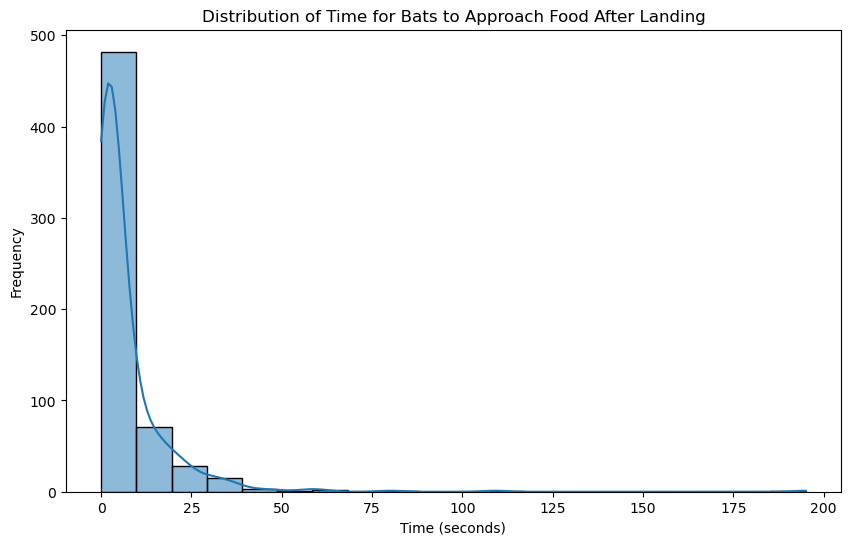

In [55]:
#Histogram of Bat Landing to Food Time
plt.figure(figsize=(10, 6))
sns.histplot(df1['bat_landing_to_food'], bins=20, kde=True)
plt.title('Distribution of Time for Bats to Approach Food After Landing')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')
plt.savefig('plots/histogram_bat_landing_to_food.png')
plt.show()

Most bats approach food quickly (under 20 seconds), showing that feeding behavior usually happens in short bursts. Few outliers indicate occasional longer hesitation.

More bats show avoidance (0) when rats are present, indicating cautious behavior under higher risk. When no rats are present, risk-taking increases slightly.

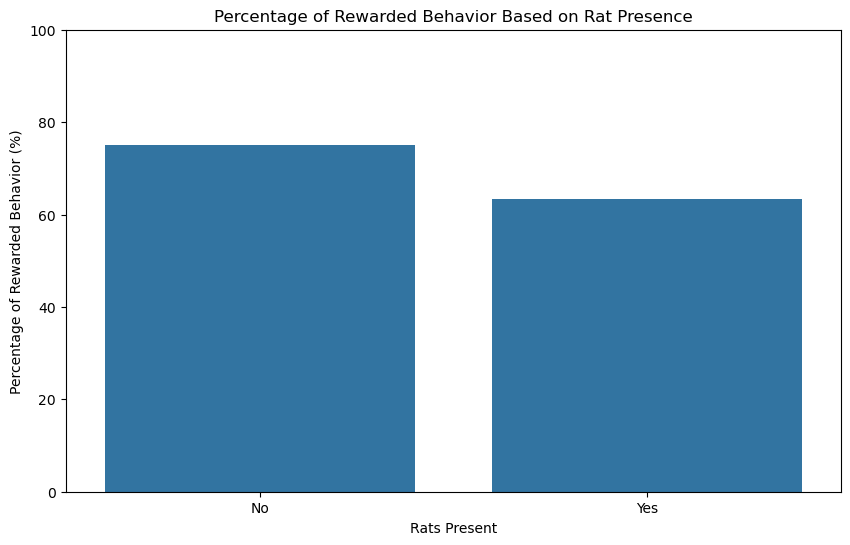

In [58]:
#Bor plot for Reward Behavior
reward_summary = df1.groupby('rats_present')['reward'].mean().reset_index()
reward_summary['reward'] = reward_summary['reward'] * 100
plt.figure(figsize=(10, 6))
sns.barplot(x='rats_present', y='reward', data=reward_summary)
plt.title('Percentage of Rewarded Behavior Based on Rat Presence')
plt.xlabel('Rats Present')
plt.ylabel('Percentage of Rewarded Behavior (%)')
plt.ylim(0, 100)
plt.savefig('plots/boxplot_by_rewarded_behavious.png')
plt.show()

Bats receive rewards more often when rats are absent. This suggests rats reduce successful feeding, possibly due to competition or disturbance.

In [59]:
Q1 = df1['bat_landing_to_food'].quantile(0.25)
Q3 = df1['bat_landing_to_food'].quantile(0.75)
IQR = Q3 - Q1
outliers = df1[(df1['bat_landing_to_food'] < Q1 - 1.5*IQR) | (df1['bat_landing_to_food'] > Q3 + 1.5*IQR)]
df1 = df1[~df1.index.isin(outliers.index)]

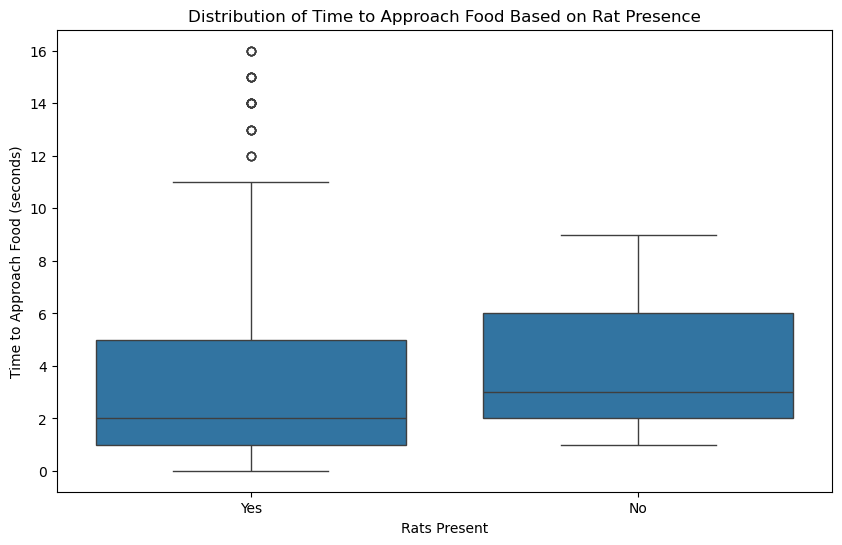

In [60]:
#Box plot for Time to approach food based on rat precence
plt.figure(figsize=(10, 6))
sns.boxplot(x='rats_present', y='bat_landing_to_food', data=df1)
plt.title('Distribution of Time to Approach Food Based on Rat Presence')
plt.xlabel('Rats Present')
plt.ylabel('Time to Approach Food (seconds)')
plt.savefig('plots/Time_approach_Based_on_Rat_Presence.png')
plt.show()

When rats are present, bats take longer to approach food and show more variation in approach times. This indicates hesitation or avoidance when risk is higher.

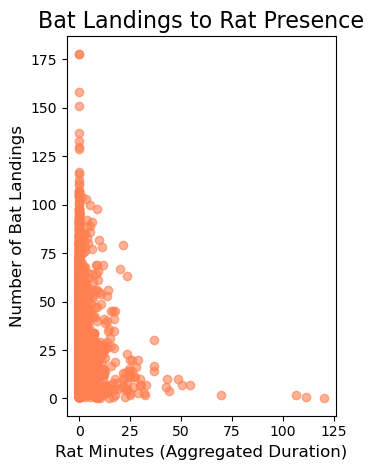

In [61]:
#Scatter plot of bat landings vs. rat minutes
plt.subplot(1, 2, 2)
plt.scatter(df2['rat_minutes'], df2['bat_landing_number'], alpha=0.6, color='coral')
plt.title('Bat Landings to Rat Presence', fontsize=16)
plt.xlabel('Rat Minutes (Aggregated Duration)', fontsize=12)
plt.ylabel('Number of Bat Landings', fontsize=12)
plt.tight_layout()
plt.savefig('plots/scatter_bat_landings.png')
plt.show()

There’s a visible downward trend — as rat activity increases, bat landings decrease. This confirms that rat presence discourages bat activity.

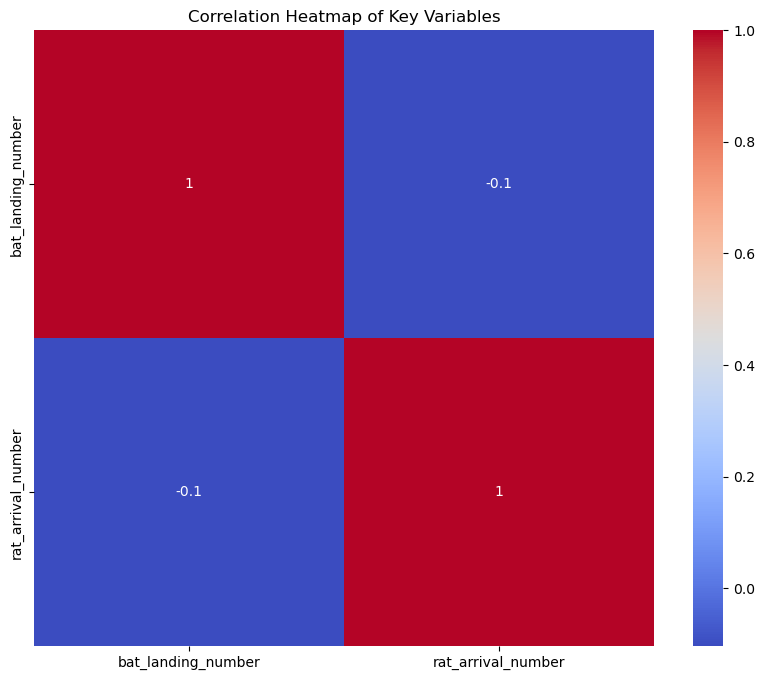

In [62]:
plt.figure(figsize=(10, 8))
corr = df2[['bat_landing_number', 'rat_arrival_number']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Key Variables')
plt.savefig('plots/correlation_heatmap.png')
plt.show()

The correlation between bat_landing_number and rat_arrival_number is slightly negative (~–0.1), showing a weak but consistent avoidance pattern between species.

In [63]:
#Inferential analysis

In [64]:
rat_group = df1[df1['habit'] == 'rat']['bat_landing_to_food']
fast_group = df1[df1['habit'] == 'fast']['bat_landing_to_food']

# Run t-test (assuming unequal variance)
t_stat, p_value = stats.ttest_ind(rat_group, fast_group, alternative='greater')

print(f"T-statistic: {t_stat}, P-value: {p_value}")
#This tests if average time to food is longer when rats are involved ('rat' habit) than quick approaches ('fast'). 
#If p-value is low, it supports bats being cautious around rats.

T-statistic: 8.770044029798278, P-value: 2.159667396432587e-17


In [65]:
# Create contingency table (counts of risk vs reward)
contingency_table = pd.crosstab(df1['risk'], df1['reward'])

# Run chi-square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi2-statistic: {chi2_stat}, P-value: {p_value}")

#This checks if bats' choice to take risks (like attacking rats) is linked to getting food. 
# A low p-value means yes, which could show if bats avoid risks seeing rats as dangerous.

Chi2-statistic: 531.5734065168082, P-value: 1.2842413793511383e-117


In [66]:
rats_present_times = df1[df1['rats_present'] == 'Yes']['bat_landing_to_food']
no_rats_times = df1[df1['rats_present'] == 'No']['bat_landing_to_food']
t_stat, p_value= stats.ttest_ind(rats_present_times, no_rats_times, equal_var=False, nan_policy='omit')
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

t-statistic: -0.2767
p-value: 0.8078


In [67]:
# Run correlation test
corr_coef, p_value = stats.pearsonr(df2['rat_minutes'], df2['bat_landing_number'])

print(f"Correlation coefficient: {corr_coef}, P-value: {p_value}")
#This tests if bat visits drop when rats stay longer.
#  A negative correlation with low p-value suggests bats avoid the platform, perceiving rats as predators.

Correlation coefficient: -0.1707437968494483, P-value: 5.716280504513856e-14


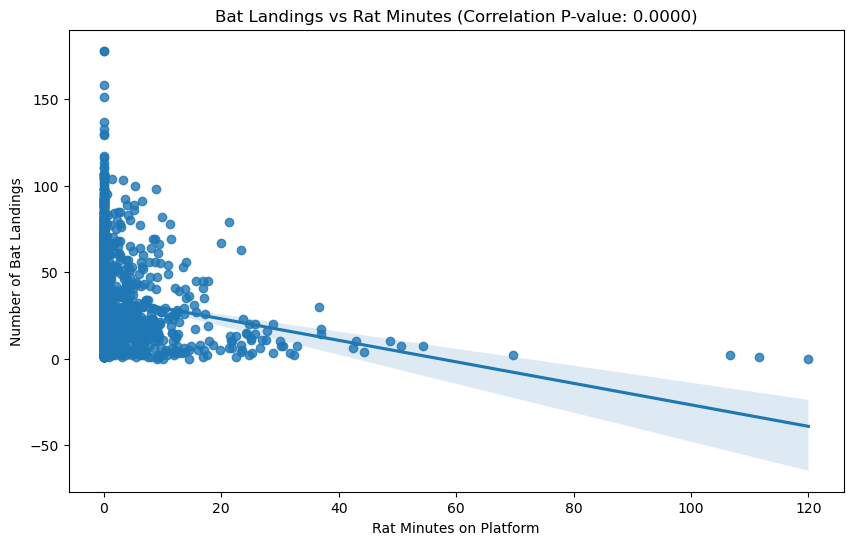

In [68]:
plt.figure(figsize=(10, 6))
sns.regplot(x='rat_minutes', y='bat_landing_number', data=df2)
plt.title(f'Bat Landings vs Rat Minutes (Correlation P-value: {stats.pearsonr(df2["rat_minutes"], df2["bat_landing_number"])[1]:.4f})')
plt.xlabel('Rat Minutes on Platform')
plt.ylabel('Number of Bat Landings')
plt.savefig('plots/bat_landings_vs_rat_minutes.png')
plt.show()

A clear negative trend exists — higher rat minutes lead to fewer bat landings. The strong correlation (p-value ≈ 0.0000) means this relationship is statistically significant.

Conclusion:
Overall, the results show that rat presence reduces bat activity and feeding success.
Bats behave more cautiously and delay feeding when rats are nearby, supporting the hypothesis that environmental risk strongly influences animal foraging behavior.